Import dependencies

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

Values given by the assignment 

In [2]:
MTOW = 43090 #kg
OEW = 24593 #kg
fuel_weight = 8832 #kg
b = 28.08
S = 93.5
c4_sweep = math.radians(17.45)
tr = 0.235
L_fus = 35.50

V_app = 128 # knots
h_app = 0
V_cr = 430 # knots
h_cruise = 30000 # ft


In [4]:
c_r = 5.392

V = 128 # knots
T = 288.15 # K
a = np.sqrt(1.4*287.0*T)
M = (V/1.943845249222) / a
alpha_0l = np.radians(-1.8)
alphas = np.radians(np.linspace(-5, 20))
cl_max = 1.340
c_f_div_c = 0.35
dc_div_cf_50deg = 0.41
dc_div_cf_20deg = 0.17

C_1 = 0.5

beta = np.sqrt(1-M**2)
eta = 0.95

#def method_determine(C_)
def dCl_max(dc_div_cf):
    return 1.6*(1 + dc_div_cf*c_f_div_c)

def QCSweep_to_LESweep(QCSweep, taper_ratio, wing_span, root_chord):
    return math.atan(math.tan(QCSweep) + (1/4) * ((2 * root_chord) / wing_span) * (1 - taper_ratio))

def QCSweep_to_HalveCordSweep(QCSweep, taper_ratio, wing_span, root_chord):
    return math.atan(math.tan(QCSweep) - (1/3) * ((2 * root_chord) / wing_span) * (1 - taper_ratio))

def QCSweep_to_hingelineSweep(QCSweep, taper_ratio, wing_span, root_chord,  c):
    return math.atan(math.tan(QCSweep) - (0.3) * ((2 * root_chord) / wing_span) * (1 - taper_ratio))

HC_sweep = QCSweep_to_HalveCordSweep(c4_sweep, tr, b, c_r)
LE_sweep = np.degrees(QCSweep_to_LESweep(c4_sweep, tr, b, c_r))
AR = b**2/S
AR_limit = 4/((C_1+1)*math.cos(np.radians(LE_sweep)))

dclalpha = 2*np.pi*AR/(2+np.sqrt(4+((AR*beta/eta)**2))*(1+((np.tan(HC_sweep))**2)/(beta**2)))

print(f"The dcl/dalpha slope is {dclalpha*np.pi/180}")


# C_l max definition for clean wing
# According to DATCOM zero lift angle is going to be the same


# NACA  64(1)-212
dy = 21.3*0.12

DCLmaxDcl= .82
delta_CL_Max = 2.4
CL_max = .82*cl_max
alpha_s = CL_max/dclalpha + (alpha_0l) + np.radians(delta_CL_Max)


CL = dclalpha*(alphas-alpha_0l)

print(CL_max, np.degrees(alpha_s))

print(f'The leading edge sweep is: {LE_sweep}')
print(f'The leading edge sweep is: {LE_sweep}')
print(f'The lower limit AR for High AR DATCOM method is: {AR_limit}')
print(f'The leading edge sweep is: {LE_sweep}')
print(f'The CL_max is: {CL_max}')

The dcl/dalpha slope is 0.08133176742752256
1.0988 14.11009617464882
The leading edge sweep is: 21.19571251545713
The leading edge sweep is: 21.19571251545713
The lower limit AR for High AR DATCOM method is: 2.8601536001811767
The leading edge sweep is: 21.19571251545713
The CL_max is: 1.0988


14.11009617464882


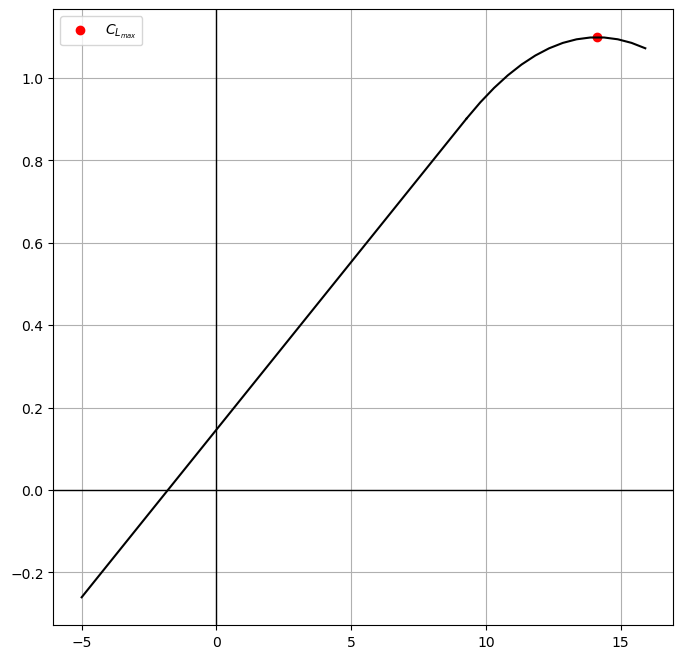

In [5]:
fig, axs = plt.subplots(figsize=(8, 8))
axs.grid(True)
axs.axhline(linewidth=1, color="k")
axs.axvline(linewidth=1, color="k")
x = np.degrees(alphas)
axs.plot(x[:28+1], CL[:28+1], color='black')
axs.scatter(np.degrees(alpha_s), CL_max, color='red', label= '$C_{L_{max}}$')
print(np.degrees(alpha_s))
#axs.scatter(x[35], CL[35])
#coef = np.array([-0.00838662,  0.23708306, -0.57673129])
#vector = np.array([x**2, x, 1])

axs.plot(x[28:42], - 0.00838662*x[28:42]**2 + 0.23708306*x[28:42] - 0.57673129, color = 'black')
plt.legend()
plt.show()